In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.tree import plot_tree

In [54]:
df = pd.read_csv("shop_smart_ecommerce.csv")


# Exploratory Data Analysis

([<matplotlib.patches.Wedge at 0x1cdba604440>,
 [Text(-0.9725550193048339, 0.5139423454289151, 'No'),
  Text(0.9725551867684546, -0.5139420285302385, 'Yes')],
 [Text(-0.5304845559844548, 0.28033218841577184, '84.5%'),
  Text(0.530484647328248, -0.28033201556194826, '15.5%')])

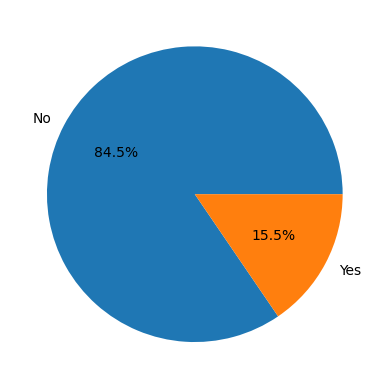

In [63]:
classes_count = df["Revenue"].value_counts()
plt.pie(classes_count, labels=["No", "Yes"], autopct="%1.1f%%")


# Feature Preprocessing and Transformations

In [55]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()

df["Revenue"]=le.fit_transform(df["Revenue"])
df["Weekend"]=le.fit_transform(df["Weekend"])
df["Month"]=le.fit_transform(df["Month"])
df["VisitorType"]=le.fit_transform(df["VisitorType"])


In [44]:
x = df.drop(columns=["Revenue","OperatingSystems","SpecialDay","Month","TrafficType","Region","Weekend","Informational_Duration"], axis=1)
y = df["Revenue"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [46]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = model.predict(x_test)

print("accuracy :",accuracy_score(y_test, y_pred))
print("F1 score :",f1_score(y_test, y_pred))

accuracy : 0.8471208434712084
F1 score : 0.5385556915544676


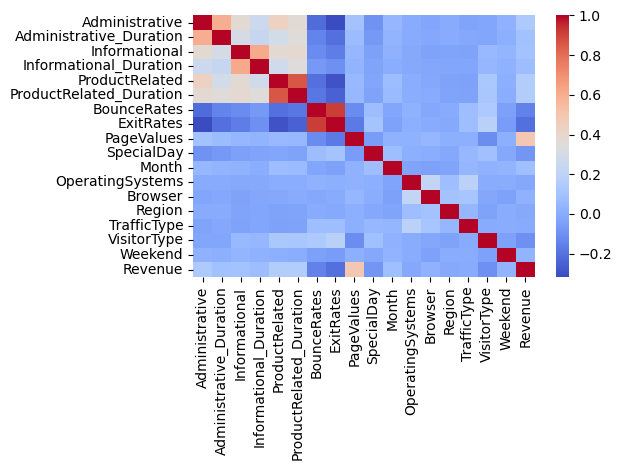

In [47]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm")
plt.tight_layout()

In [48]:
corr_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.048560,-0.006347,-0.025035,-0.005487,-0.033561,-0.025820,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.029061,-0.007343,-0.015392,-0.005561,-0.014376,-0.023940,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.019743,-0.009527,-0.038235,-0.029169,-0.034491,0.055828,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.005987,-0.009579,-0.019285,-0.027144,-0.024675,0.044677,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.070299,0.004290,-0.013146,-0.038122,-0.043064,0.126656,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.061186,0.002976,-0.007380,-0.033091,-0.036377,0.119329,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.023763,0.023823,-0.015772,-0.006485,0.078286,0.135536,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.039049,0.014567,-0.004442,-0.008907,0.078616,0.179144,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.021780,0.018508,0.045592,0.011315,0.012532,-0.111228,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.079341,0.012652,0.003499,-0.016098,0.052301,0.085557,-0.016767,-0.082305


# Data Pruning

In [50]:
max_depth =[2, 3, 4, 5, 6, 7, 8, 9, 10]

for depth in max_depth:
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)

    acc = model.score(x_test, y_test)
    print(f"for depth={depth}, accuracy={acc}")


for depth=2, accuracy=0.8471208434712084
for depth=3, accuracy=0.8450932684509327
for depth=4, accuracy=0.845904298459043
for depth=5, accuracy=0.8454987834549879
for depth=6, accuracy=0.8467153284671532
for depth=7, accuracy=0.8418491484184915
for depth=8, accuracy=0.8450932684509327
for depth=9, accuracy=0.8442822384428224
for depth=10, accuracy=0.8434712084347121


In [51]:
min_sample_split = [5, 10, 15, 20, 25, 30]

for split in min_sample_split:
    model = DecisionTreeClassifier(max_depth=7, min_samples_split=split)
    model.fit(x_train, y_train)

    acc = model.score(x_test, y_test)
    print(f"for sample split={split}, accuracy={acc}")

for sample split=5, accuracy=0.8779399837793999
for sample split=10, accuracy=0.8791565287915653
for sample split=15, accuracy=0.8799675587996756
for sample split=20, accuracy=0.8807785888077859
for sample split=25, accuracy=0.8807785888077859
for sample split=30, accuracy=0.8803730738037308


In [56]:
model = DecisionTreeClassifier(random_state=42,max_depth=7, min_samples_split=20)
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,7
,min_samples_split,20
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [57]:
y_pred = model.predict(x_test)

print("accuracy :",accuracy_score(y_test, y_pred))
print("F1 score :",f1_score(y_test, y_pred))

accuracy : 0.8803730738037308
F1 score : 0.5815602836879432


<function matplotlib.pyplot.show(close=None, block=None)>

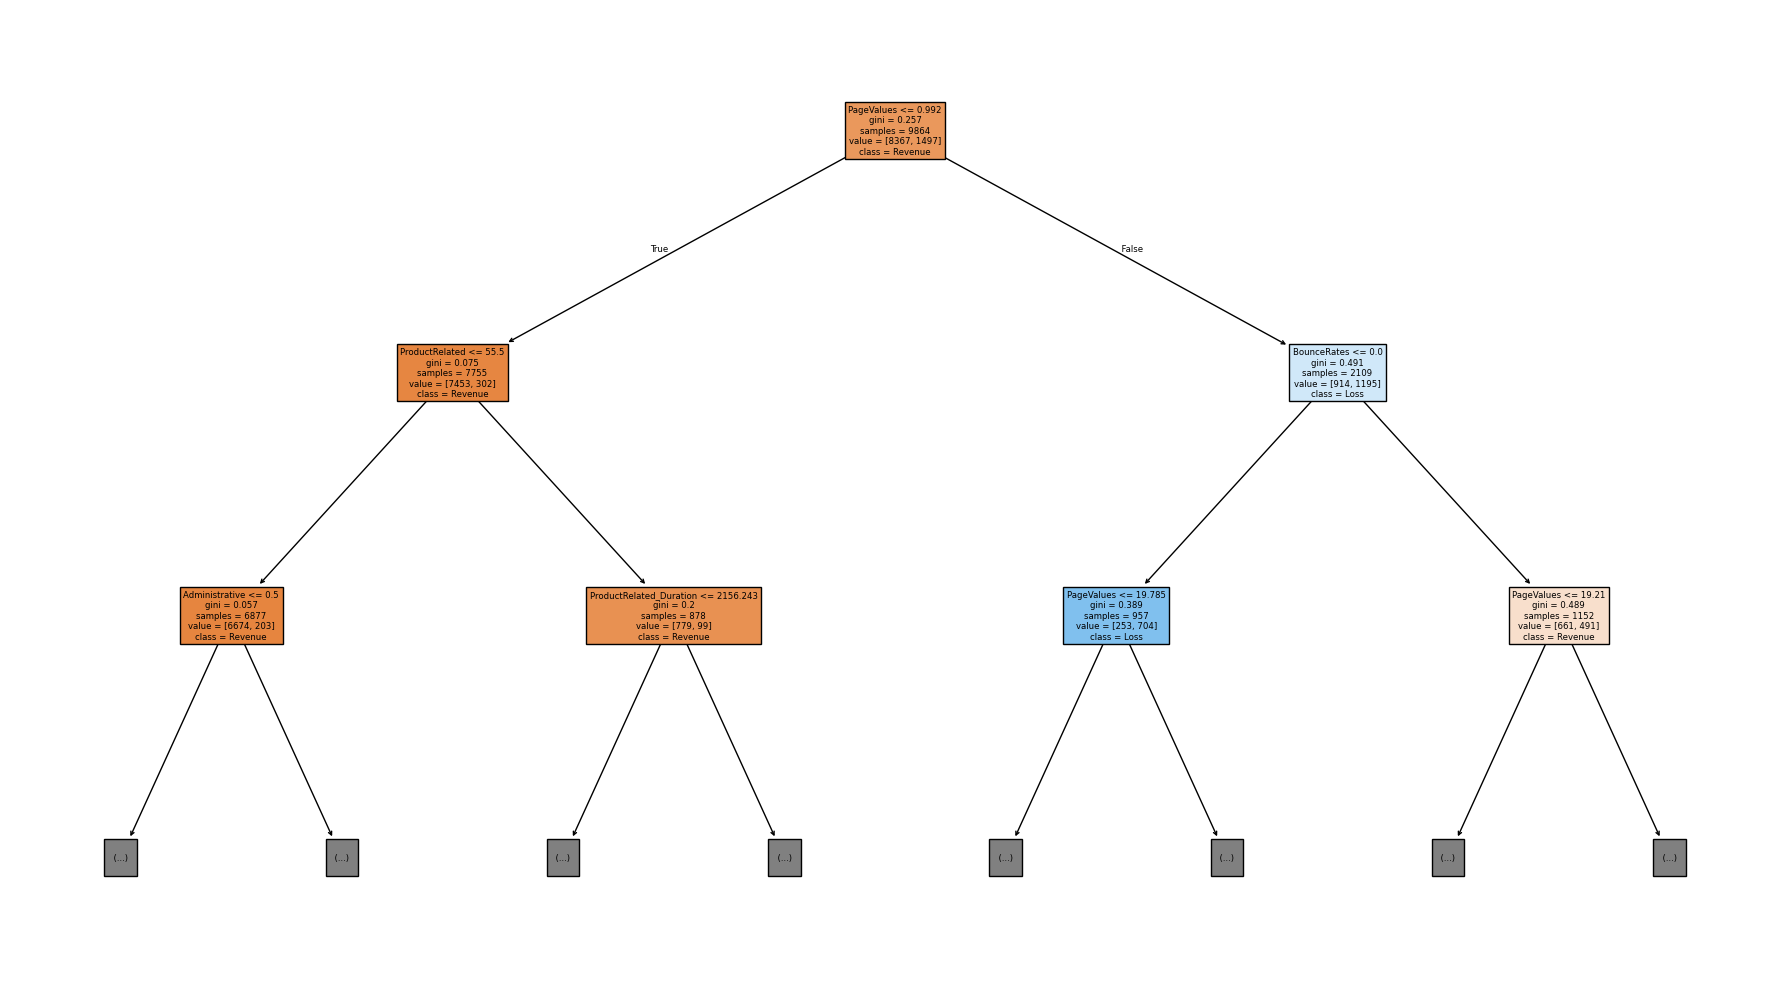

In [62]:
plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names = x.columns,
    class_names=["Revenue","Loss"],
    filled=True,
    max_depth=2
)

plt.tight_layout()
plt.show